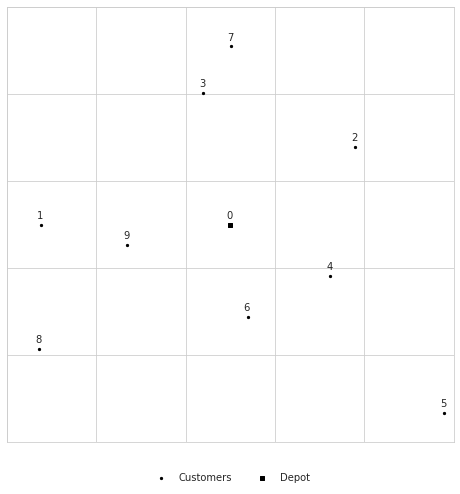

In [1]:
import static, animated, util, heuristic
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import numpy as np
np.random.seed(7)

n_customers = 9
figsize = (8,8)

coords = util.get_random_nodes(n_customers)
nodes = list(range(len(coords)))
depot, customer_nodes = nodes[0], nodes[1:]
fig, ax = plt.subplots(figsize=figsize)

static.draw_nodes(coords, nodes, ax)

## Construction heuristics

### Nearest Neighborhood
1. Randomly select a starting node
2. Add to the last node the closest node until no more node is available
3. Connect the last node with the first node

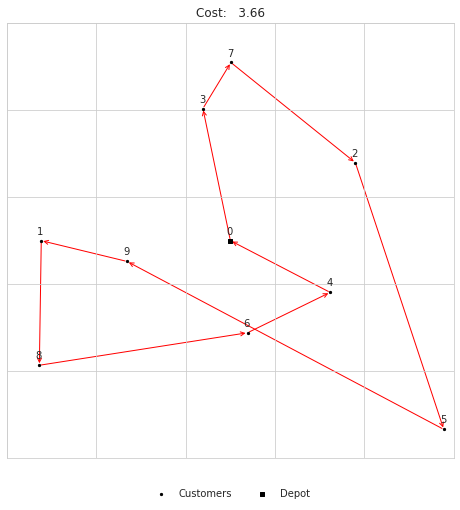

In [6]:
nn_route = heuristic.get_route_nearest_neighborhood(customer_nodes, coords, start=9)
static.construct_route(nn_route, nodes, coords, figsize=figsize)

In [3]:
animated.construct_route(nn_route, coords, nodes, figsize=figsize)

{((0, 9, 4, 5, 0), (0, 7, 1, 3, 8, 0), (0, 2, 6, 0)), ((0, 7, 8, 4, 2, 3, 1, 0), (0, 5, 0), (0, 6, 9, 0)), ((0, 8, 5, 9, 3, 7, 6, 4, 1, 0), (0, 2, 0)), ((0, 8, 2, 9, 0), (0, 7, 0), (0, 5, 3, 1, 4, 6, 0)), ((0, 1, 6, 9, 7, 4, 3, 0), (0, 5, 2, 0), (0, 8, 0)), ((0, 5, 8, 1, 3, 4, 0), (0, 2, 0), (0, 6, 9, 7, 0)), ((0, 4, 2, 5, 9, 1, 0), (0, 3, 0), (0, 7, 6, 8, 0)), ((0, 1, 2, 3, 9, 7, 0), (0, 6, 5, 0), (0, 8, 4, 0)), ((0, 3, 4, 0), (0, 2, 5, 1, 0), (0, 7, 6, 8, 9, 0)), ((0, 2, 6, 8, 0), (0, 9, 4, 7, 0), (0, 3, 5, 1, 0)), ((0, 3, 9, 4, 5, 6, 0), (0, 8, 1, 7, 0), (0, 2, 0)), ((0, 6, 1, 0), (0, 7, 5, 2, 8, 0), (0, 9, 4, 3, 0)), ((0, 7, 4, 9, 6, 2, 3, 1, 0), (0, 5, 0), (0, 8, 0)), ((0, 8, 5, 7, 0), (0, 1, 9, 6, 0), (0, 2, 3, 4, 0)), ((0, 3, 5, 6, 0), (0, 4, 9, 1, 7, 0), (0, 8, 2, 0)), ((0, 6, 7, 8, 5, 0), (0, 2, 4, 3, 1, 0), (0, 9, 0)), ((0, 6, 9, 2, 3, 1, 5, 7, 0), (0, 4, 0), (0, 8, 0)), ((0, 5, 9, 8, 3, 7, 4, 6, 1, 0), (0, 2, 0)), ((0, 3, 0), (0, 4, 6, 2, 9, 5, 1, 7, 0), (0, 8, 0)), ((0, 3, 

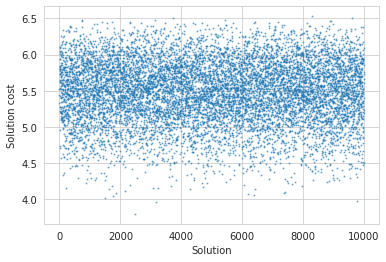

In [13]:
n_solutions = 10000
solutions = set([
    util.get_random_solution(customer_nodes, depot=depot, n_vehicles=3)
    for _ in range(n_solutions)])

sol_costs = [util.get_total_cost(s, coords) for s in solutions]
sorted_sol = sorted(solutions, key=lambda s:util.get_total_cost(s, coords), reverse=True)

plt.scatter(np.arange(len(sol_costs)), sol_costs, s=1, alpha=0.5)
plt.ylabel("Solution cost")
_ = plt.xlabel("Solution")

In [5]:
animated.show_solutions(sorted_sol[-50:], coords, nodes)

Check all possible routes (considering 9 customers = 362,880):

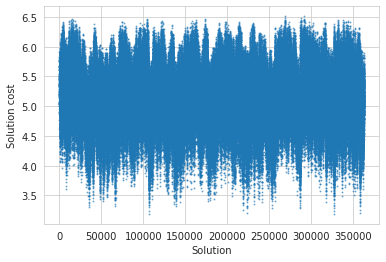

In [21]:
import itertools
possible_routes = [((depot,) +p+(depot,),) for p in itertools.permutations(customer_nodes)]
possible_route_costs = [util.get_total_cost(s, coords) for s in possible_routes]

plt.scatter(np.arange(len(possible_route_costs)), possible_route_costs, s=1, alpha=0.5)
plt.ylabel("Solution cost")
_ = plt.xlabel("Solution")

In [23]:
sorted_sol = sorted(possible_routes, key=lambda s:util.get_total_cost(s, coords), reverse=True)
animated.show_solutions(sorted_sol[-50:], coords, nodes)